**Plan for the Machine Learning NLP session at Lehman**

1. [ML & NLP definition](https://ecornell.s3.amazonaws.com/content/BTT_V2/Week+7/btt002_glossary.pdf)
2. [ML lifecycle ](https://docs.aws.amazon.com/wellarchitected/latest/machine-learning-lens/well-architected-machine-learning-lifecycle.html)
3. Data prepartion stages and tecniqies
4. Choosing a Model
5. Modle Evaluation
6. Use a prebuilt HugginFace Models : [tutorial](https://www.youtube.com/watch?v=TsfLm5iiYb4&ab_channel=NicholasRenotte)
- Additional :
7. Deply app with Flask/Gradio

Other:
 + datasets : [Kaggle](https://www.kaggle.com/discussions/general/150720)
 + Build ML/NLP App tutorial with  : [HuggingFace model text Summary ](https://www.youtube.com/watch?v=TsfLm5iiYb4&ab_channel=NicholasRenotte)
 + Langgchain & LLM for a Text Summary App : [link text](https://www.youtube.com/watch?v=zlUOsSCkQaU&ab_channel=AutomataLearningLab)


#Questions
'''


1. How long should it be ? 1-2 hr (hands on workshop)
2. What should I focus on  - Q&A opps, resources + links for further study
3. Recommnedations & Suggestions -  Gemini Google,  add more tools/comparison
4. Talk to professor Liang, clarify the structure
5. How often can I do the ML/AI sessions 1 per mounth , based on on project


In [ ]:
# Examples
# https://lms.ecornell.com/courses/1664467/assignments/10215625?module_item_id=24203425
# https://www.kaggle.com/code/inzamamsafi/text-summarization-using-nlp-beginner
'''
Good explanation : https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
Text Summary - https://medium.com/analytics-vidhya/text-summarization-using-nlp-3e85ad0c6349
Video - https://www.youtube.com/watch?v=xvLQdP549NA&ab_channel=JCharisTech
'''

'\nGood explanation : https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools\n'

In [ ]:
import pandas as pd

#https://www.kaggle.com/datasets/hsankesara/medium-articles
df = pd.read_csv('/content/articles.csv.zip')

In [ ]:
df.head(4)

,author,claps,reading_time,link,title,text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...


In [ ]:
#convert to numeric
df['claps'] = df['claps'].str.replace('K', 'e3').astype(float)

In [ ]:
# sort by the popularity
df_sorted = df.sort_values(by='claps', ascending=False)

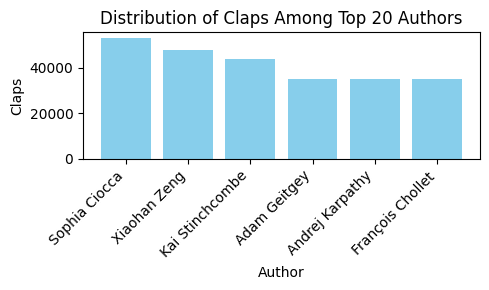

In [ ]:
# Plot distribution of claps for top 20 authors
plt.figure(figsize=(5, 3))
plt.bar(df_sorted['author'][:10], df_sorted['claps'][:10], color='skyblue')
plt.xlabel('Author')
plt.ylabel('Claps')
plt.title('Distribution of Claps Among Top 20 Authors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-142-829c2f45b0dc>:14: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from current font.
  plt.tight_layout()
<ipython-input-142-829c2f45b0dc>:14: UserWarning: Glyph 128118 (\N{BABY}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128118 (\N{BABY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


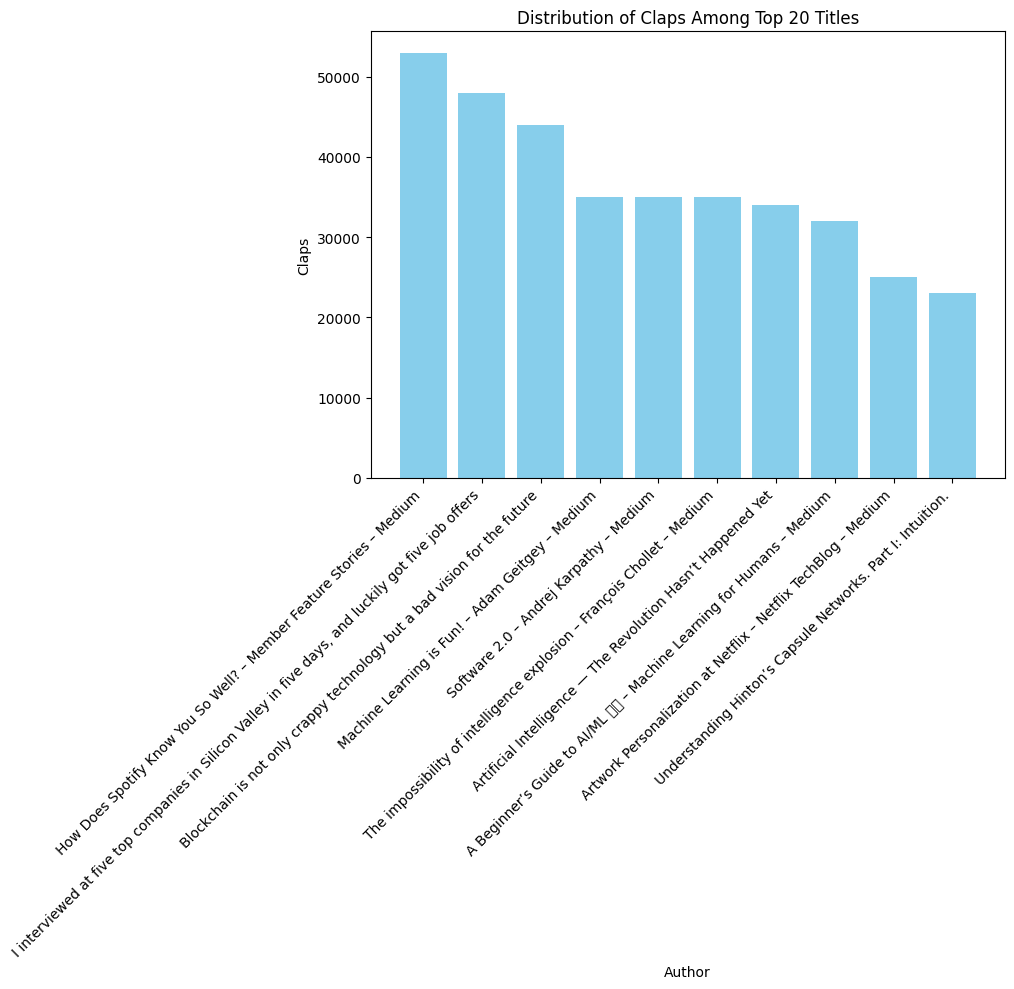

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the font family
plt.rcParams['font.family'] = 'DejaVu Sans'

# Plot distribution of claps for top 20 authors
plt.figure(figsize=(10, 10))
plt.bar(df_sorted['title'][:20], df_sorted['claps'][:20], color='skyblue')
plt.xlabel('Author')
plt.ylabel('Claps')
plt.title('Distribution of Claps Among Top 20 Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


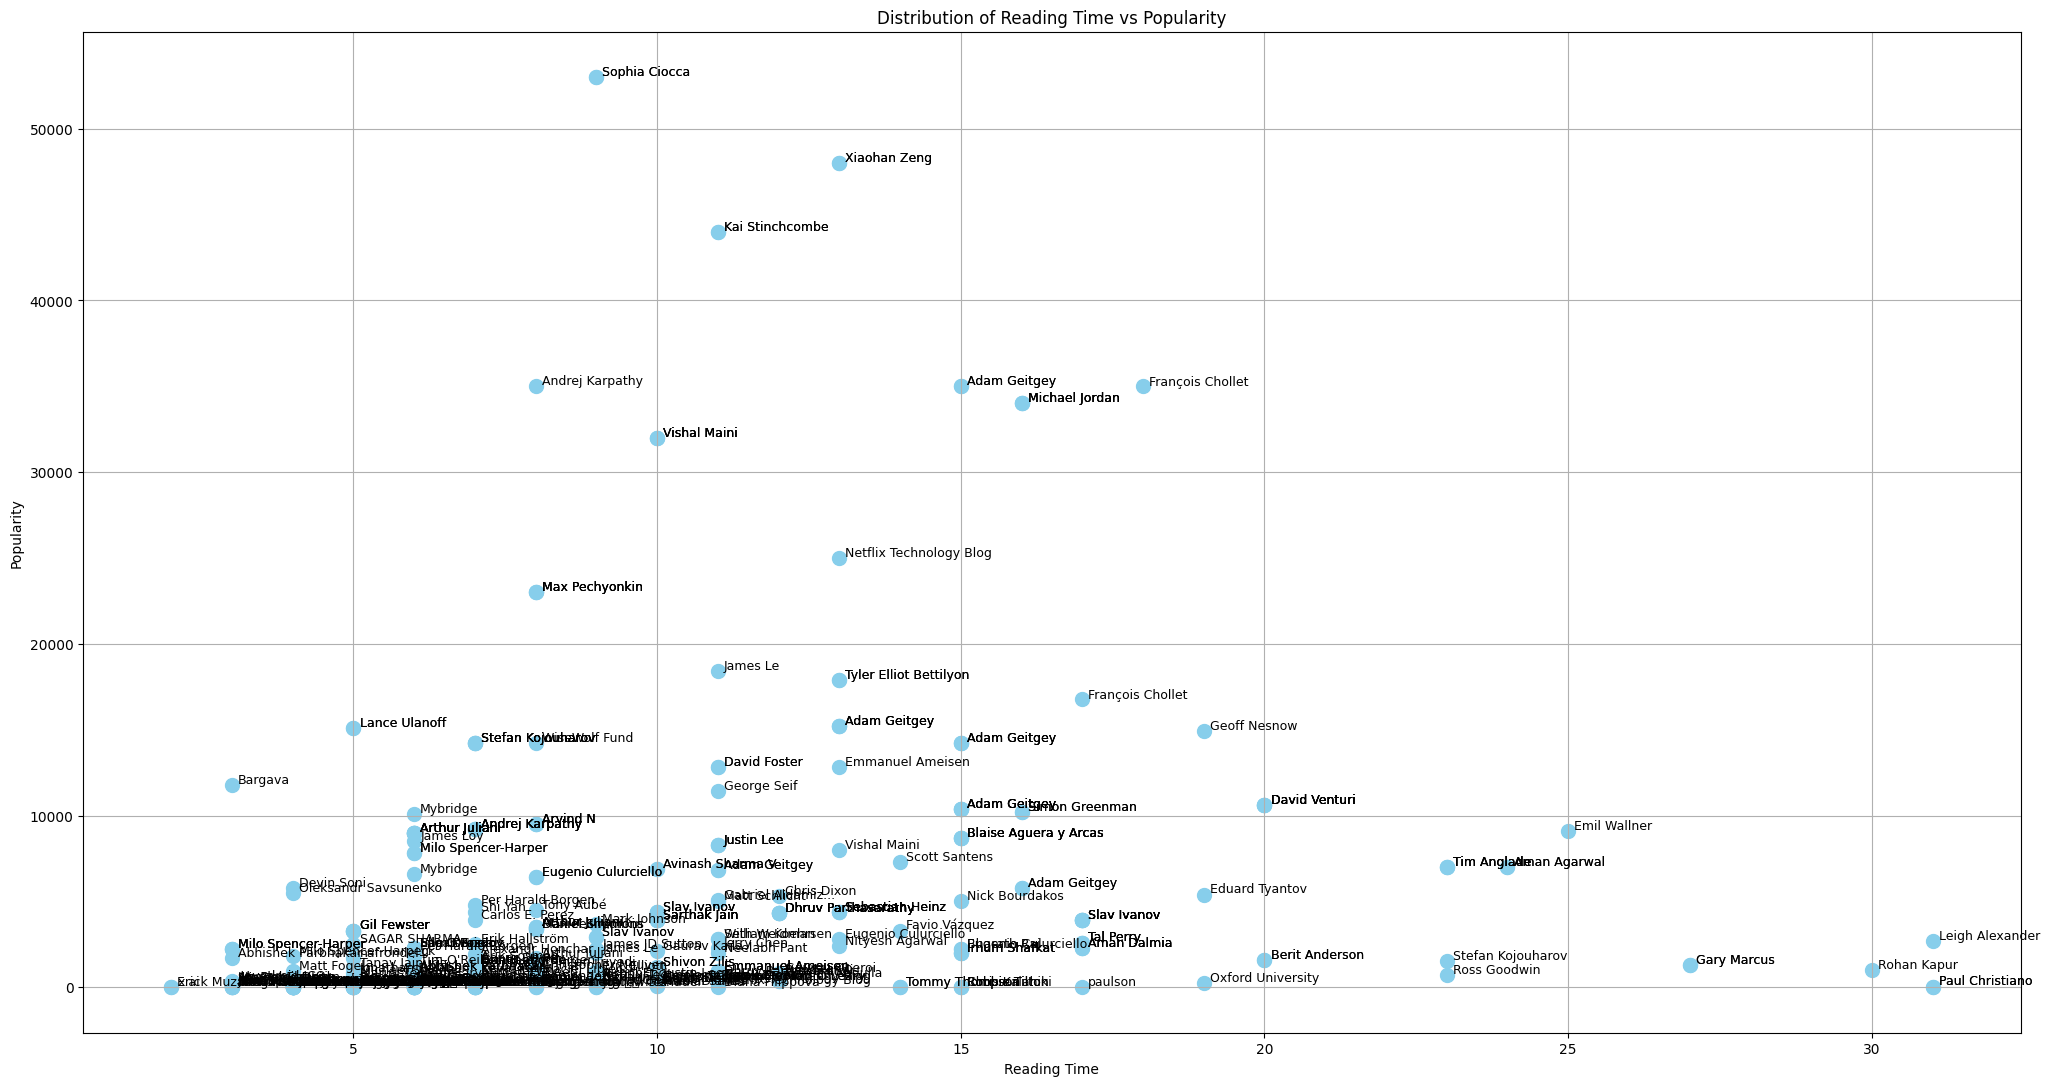

In [ ]:
# Plot distribution of reading time and popularity (claps)
plt.figure(figsize=(25, 13))
plt.scatter(df['reading_time'], df['claps'], color='skyblue', s=100)
plt.xlabel('Reading Time')
plt.ylabel('Popularity')
plt.title('Distribution of Reading Time vs Popularity')
plt.grid(True)
for i in range(len(df)):
    plt.text(df['reading_time'][i] + 0.1, df['claps'][i] + 100, df['author'][i], fontsize=9)
plt.show()

In [ ]:
df.describe()

,claps,reading_time
count,337.000000,337.000000
mean,5406.311573,9.700297
std,9089.187145,5.482855
min,1.000000,2.000000
25%,157.000000,6.000000
50%,2000.000000,8.000000
75%,7000.000000,13.000000
max,53000.000000,31.000000


**Analyzing text statistics**


word frequency analysis,
sentence length analysis,
average word length analysis,


In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop=set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus=[]
new= df_sorted['title'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<BarContainer object of 10 artists>

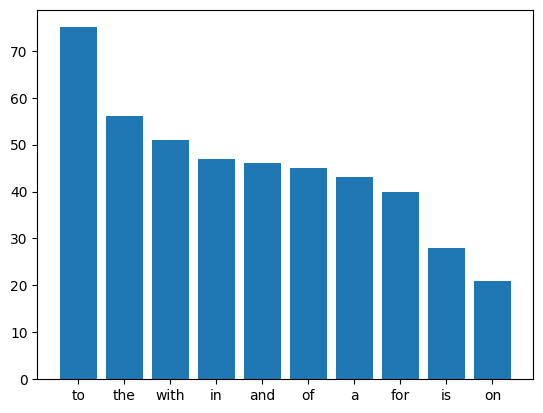

In [ ]:
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*top)
plt.bar(x,y)

<Axes: >

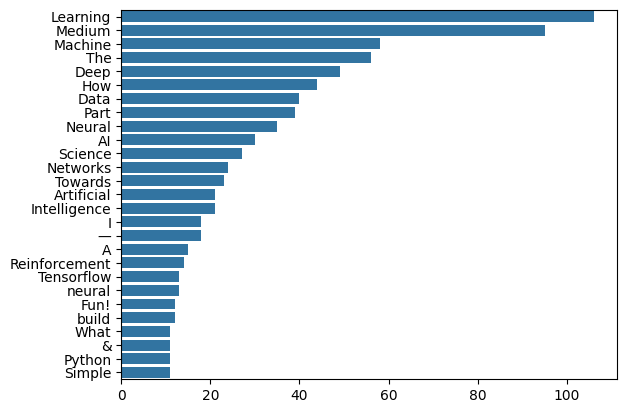

In [ ]:
import seaborn as sns
from collections import Counter

# Assuming you have already defined corpus, stop, and most as in your code

# Count the words in the corpus
counter = Counter(corpus)
most = counter.most_common()

x, y = [], []
# Start from index 1 to avoid the first potentially empty word
for word, count in most[1:41]:
    if word not in stop:
        x.append(word)
        y.append(count)

sns.barplot(x=y, y=x)


**N-gram**